# Bay Wheels Trips in 2019
## by Taghreed Fayez

## Investigation Overview

We will investigate Bay Wheels trips for year 2019, Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

We will Try to answer questions like:
- When are most trips taken in terms of day of the week, or month of the year?
- How long does in average trip take?
- Does the above differ if a user is a subscriber or customer?


## Dataset Overview

The Data of trips in 2019 downloaded from [Bay Wheels trip history data](https://www.lyft.com/bikes/bay-wheels/system-data), There are 12 csv files (one for each month).

After Joining the files and do a little wrangling, The final Dataset has 2506983 rows and 13 columns. The main numerical feature is the Duration of trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trips = pd.read_csv('../Data/2019/2019_trips.csv')

In [3]:
## order day of week as CategoricalDtype ordered
## week start from monday
week_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = week_order)

trips['day_of_week'] = trips.day_of_week.astype(weekdays)

In [4]:
most_trips = trips.loc[(trips['duration_min'] <= 30) & (trips['duration_min'] >= 3)]

In [5]:
base_color = sns.color_palette()[0]

## Distribution of Trips Duration

> In log scale the distribution is Unimodal Distribution with mode around 10 minutes, Most trips' duration range between 3 - 30 minutes, with some outliers over 300 minutes.

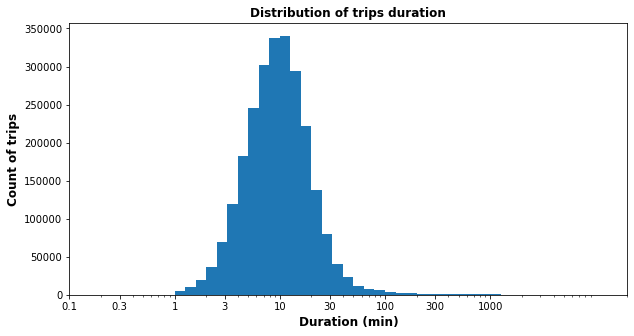

In [6]:
plt.figure(figsize=[10, 5])

bins = 10 ** np.arange(0, 4.2, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]

plt.hist(data = trips, x = 'duration_min', bins = bins);

plt.xscale('log');
plt.xticks(ticks, ticks);

plt.xlabel('Duration (min)', fontweight='bold', fontsize='large');
plt.ylabel('Count of trips', fontweight='bold', fontsize='large');
plt.title('Distribution of trips duration', fontweight='bold', fontsize='large');

## Proportion of Users

> About 80% of users are Subscribers & 20% of users are Customers.

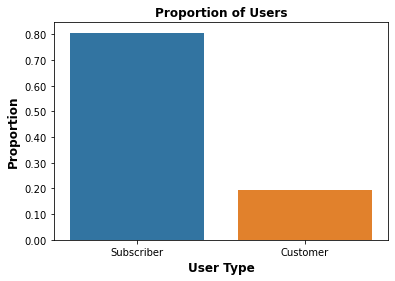

In [7]:
n_trips = trips.shape[0]
max_prop = trips.user_type.value_counts()[0]/ n_trips

sns.countplot(data = trips, x = 'user_type');

tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.yticks(tick_props * n_trips, tick_names)
plt.xlabel('User Type', fontweight='bold', fontsize='large');
plt.ylabel('Proportion', fontweight='bold', fontsize='large');
plt.title('Proportion of Users', fontweight='bold', fontsize='large');

## Duration of trips by User type

> Excluding Outliers, Subscribers tend to have shorter Trips about 10 minutes in average, While Customers have longer trips about 13 minutes in average.

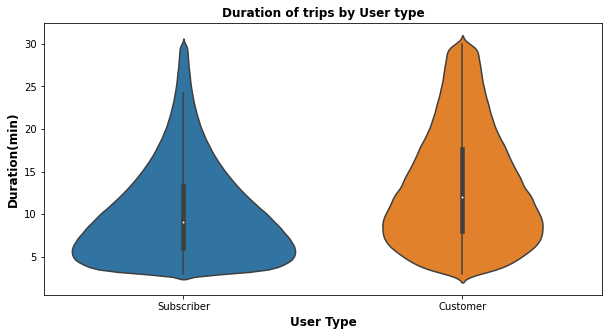

In [8]:
plt.figure(figsize=[10, 5])

sns.violinplot(data = most_trips, x = 'user_type', y = 'duration_min');

plt.xlabel('User Type', fontweight='bold', fontsize='large');
plt.ylabel('Duration(min)', fontweight='bold', fontsize='large');
plt.title('Duration of trips by User type', fontweight='bold', fontsize='large');

## Trips in Weekdays by User

> In Weekend -Sat & Sun- the count of trips is the least compared with other weekdays for Subscribers, No much difference for Customers.

> But the trips duration is longer in average about 28 min for customer & about 13 min for subscriber In Weekend.

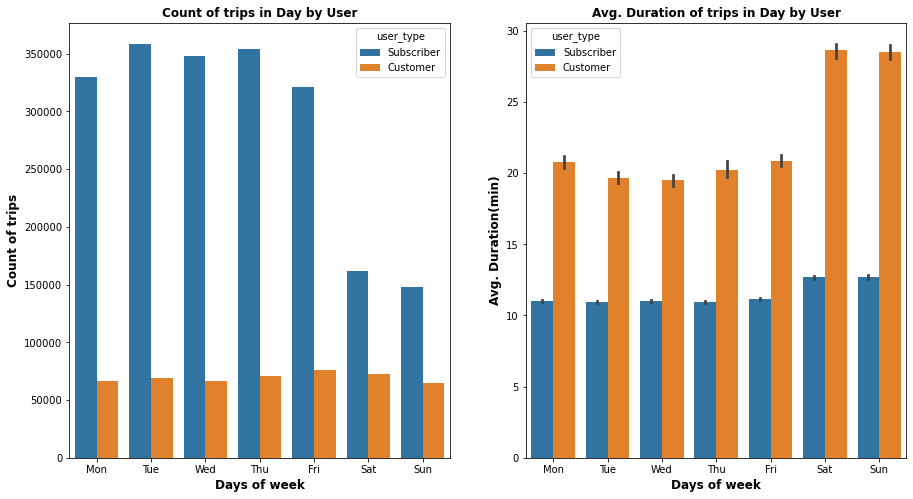

In [9]:
plt.figure(figsize=[15, 8])

plt.subplot(1, 2, 1) 
sns.countplot(data = trips, x = 'day_of_week', hue = 'user_type');

plt.xlabel('Days of week', fontweight='bold', fontsize='large');
plt.ylabel('Count of trips', fontweight='bold', fontsize='large');
plt.title('Count of trips in Day by User', fontweight='bold', fontsize='large');

plt.subplot(1, 2, 2) 
sns.barplot(data = trips, x = 'day_of_week', y = 'duration_min', hue = 'user_type');

plt.xlabel('Days of week', fontweight='bold', fontsize='large');
plt.ylabel('Avg. Duration(min)', fontweight='bold', fontsize='large');
plt.title('Avg. Duration of trips in Day by User', fontweight='bold', fontsize='large');

## Duration of trips in Day by User

> Customers have longer trips in average compared to Subscribers.

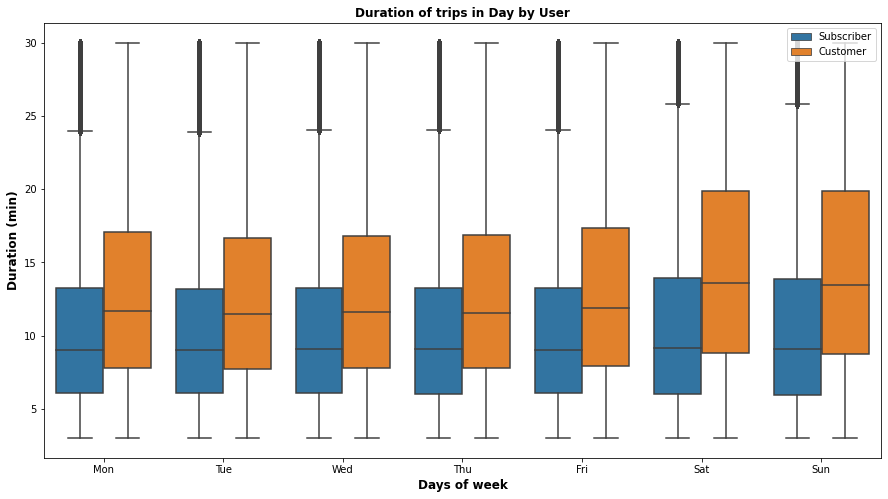

In [10]:
plt.figure(figsize=[15, 8])

sns.boxplot(data = most_trips, x = 'day_of_week', y = 'duration_min', hue = 'user_type');
plt.legend(loc = 1);      

plt.xlabel('Days of week', fontweight='bold', fontsize='large');
plt.ylabel('Duration (min)', fontweight='bold', fontsize='large');
plt.title('Duration of trips in Day by User', fontweight='bold', fontsize='large');

## Duration of trips in Month by User

> Customers have longer trips in average than Subscribers.\
> In the beginning of January, customers have the longest trips in average, the gap between customer & subscriber trips'duration is less in December.

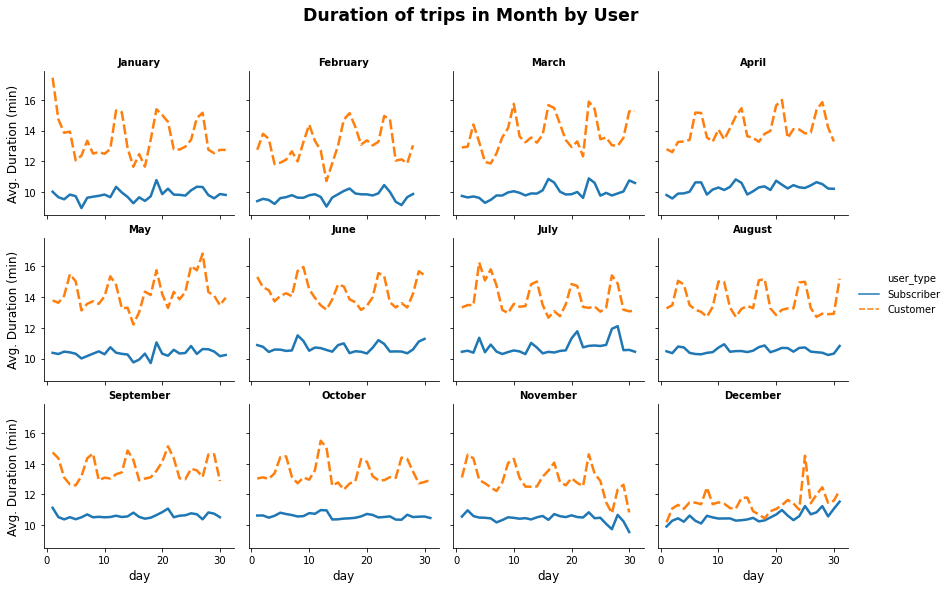

In [11]:
g = sns.relplot(x = 'day', y = "duration_min", hue = "user_type", style = "user_type",
            col = "month", col_wrap = 4, ci = None, data = most_trips,
            height = 3, linewidth = 2.5, kind = "line");

g.fig.suptitle('Duration of trips in Month by User', fontweight='bold',
               fontsize='xx-large', y = 0.9);

g.fig.subplots_adjust(top = 0.8)

g.set_titles('{col_name}', fontweight='bold', fontsize = 'x-large');

for ax in g.axes.flat:
    ax.set_ylabel('Avg. Duration (min)', fontsize='large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='large')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_2019trips.ipynb --to slides --post serve`
